In [35]:
import backtrader as bt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import backtrader.analyzers as btanalyzers
import backtrader as bt
import backtrader.analyzers as btanalyzers
import numpy as np
import pandas as pd
import quantstats
import talib
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
import math



In [53]:
class my_strategy1(bt.Strategy):
    #全局设定交易策略的参数
    params=(
        ('maperiod',20),
           )

    def __init__(self):
        #指定价格序列
        self.dataclose=self.datas[0].close
        # 初始化交易指令、买卖价格和手续费
        self.order = None
        self.buyprice = None
        self.buycomm = None
        #添加移动均线指标，内置了talib模块
        self.sma = bt.indicators.SimpleMovingAverage(
                      self.datas[0], period=30)

    def next(self):
#         if self.order: # 检查是否有指令等待执行,
#             return
        # 检查是否持仓

        size_1 = math.floor(cerebro.broker.get_cash() * 0.3 / self.datas[0].close[0])
        size_2 = math.floor(self.broker.getposition(self.data).size * 0.7)
        if not self.position: # 没有持仓
            #执行买入条件判断：收盘价格上涨突破20日均线
            if self.dataclose[0] < self.sma[0] * 0.97:
                #执行买入
                self.order = self.buy(size=size_1)
#                 print('买了！')
        else:
            if self.dataclose[0] < self.sma[0] * 0.97:
                #执行买入
                self.order = self.buy(size=size_1)
#                 print('买了！')
            #执行卖出条件判断：收盘价格跌破20日均线
            if self.dataclose[0] > self.sma[0] * 1.03:
                #执行卖出
                self.order = self.sell(size=size_2)
#                 print('卖了！')




初始资金 10000
----------------------------
最终资产 13154.099279999991
----------------------------
总收益率:  27.41%
年化收益率:32.73%
最大回撤:  19.06%
夏普比率:  3.19


<IPython.core.display.Javascript object>


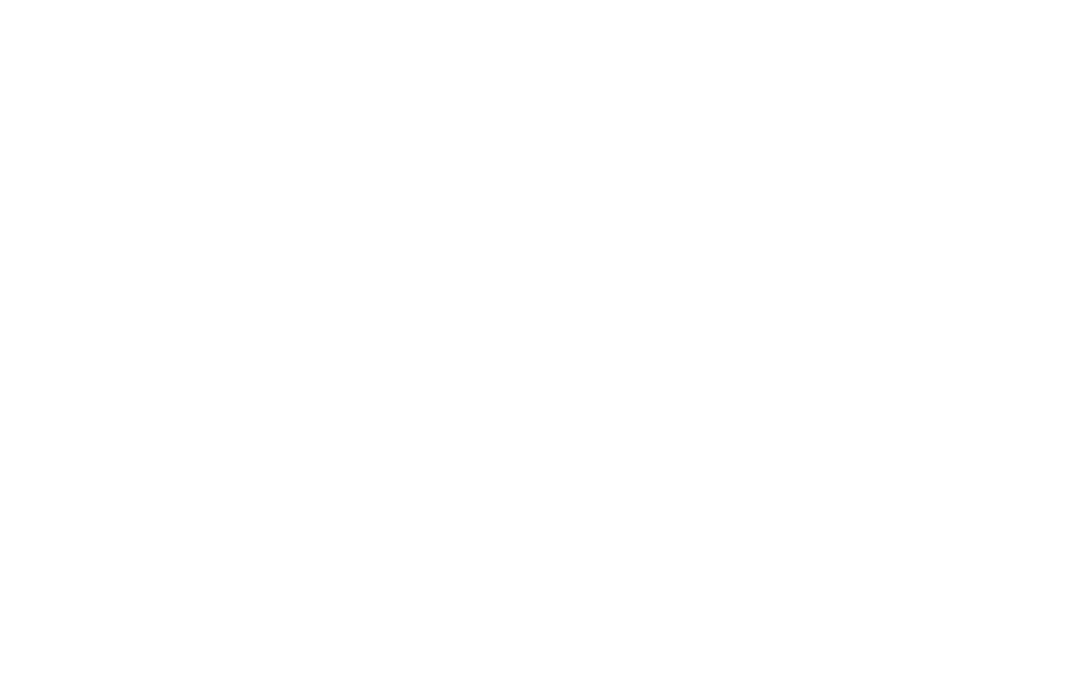

<IPython.core.display.Javascript object>


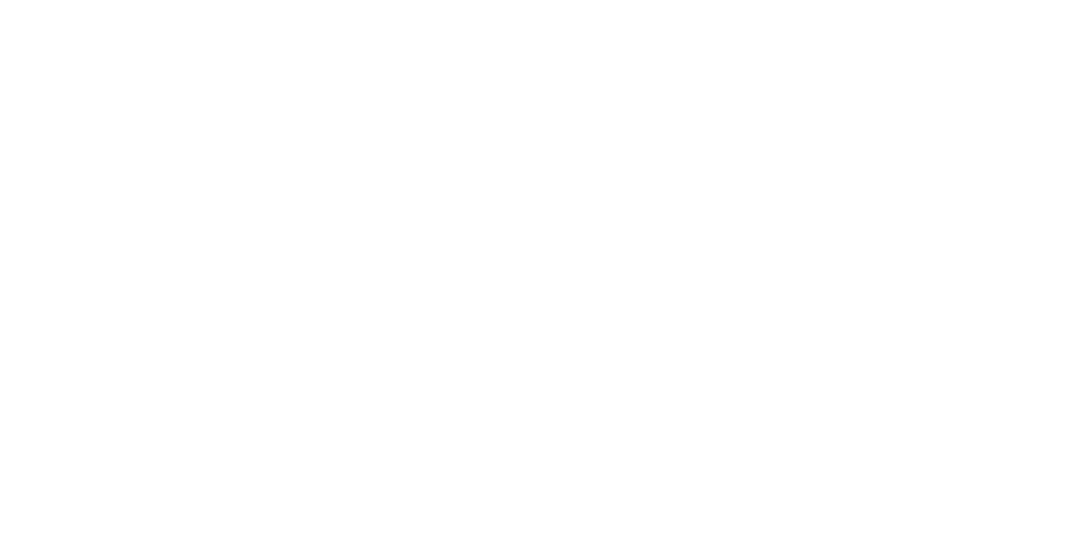

<IPython.core.display.Javascript object>


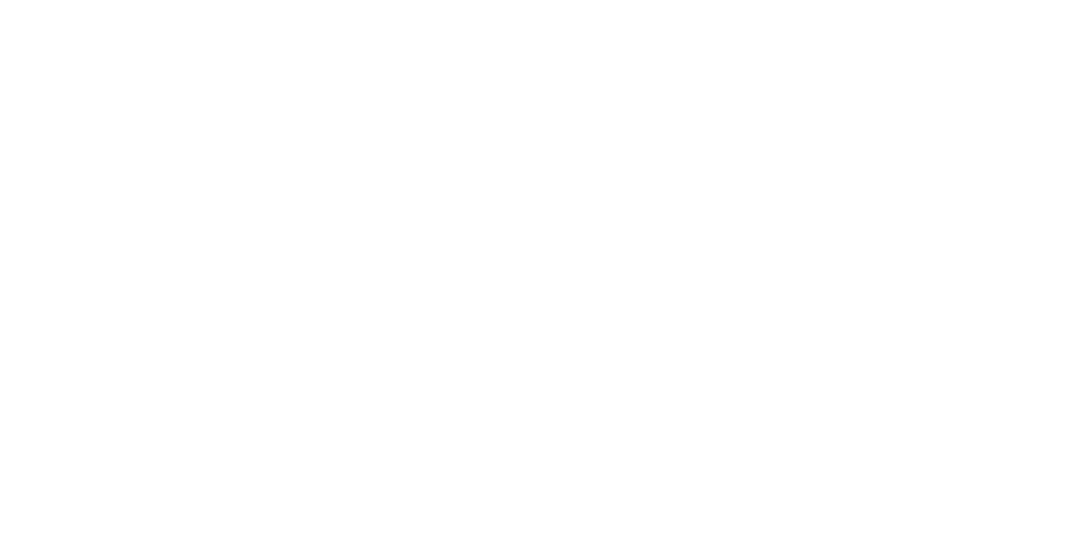

<IPython.core.display.Javascript object>


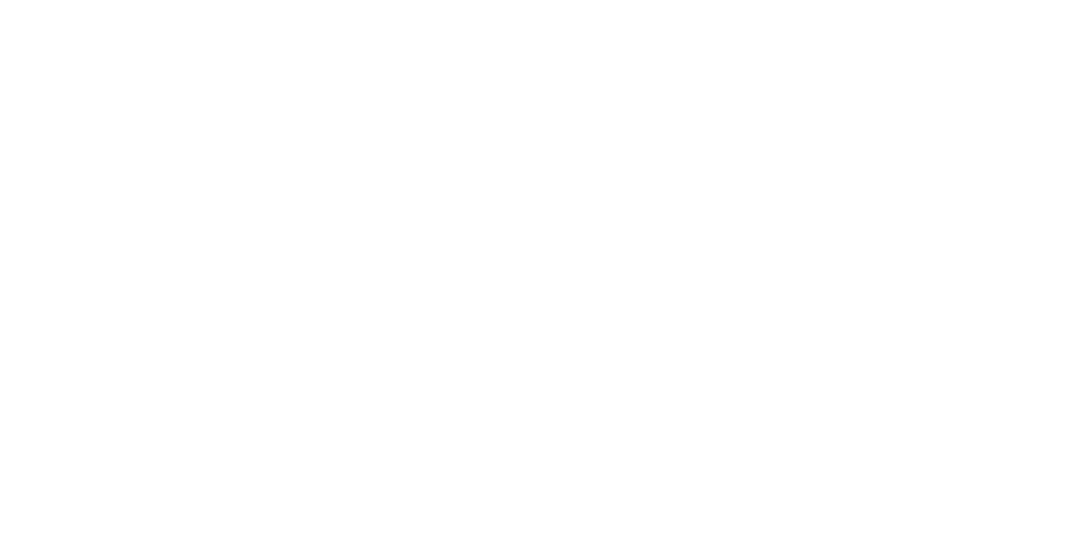

<IPython.core.display.Javascript object>


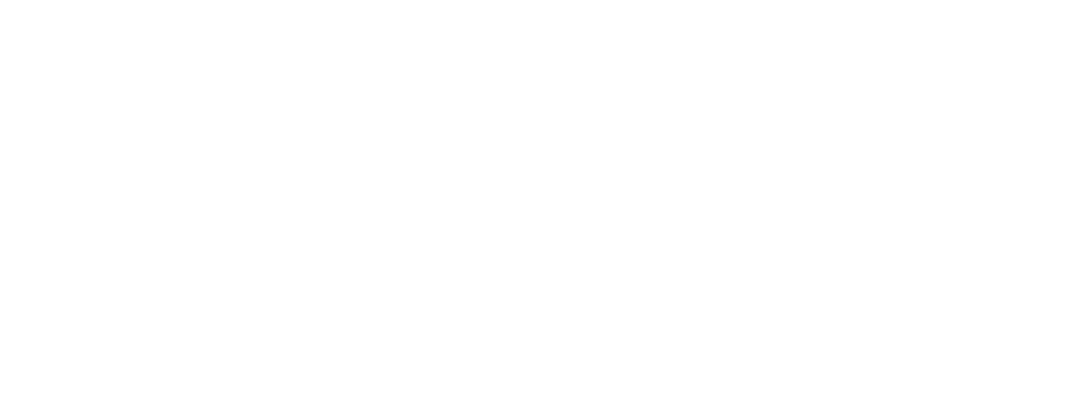

<IPython.core.display.Javascript object>


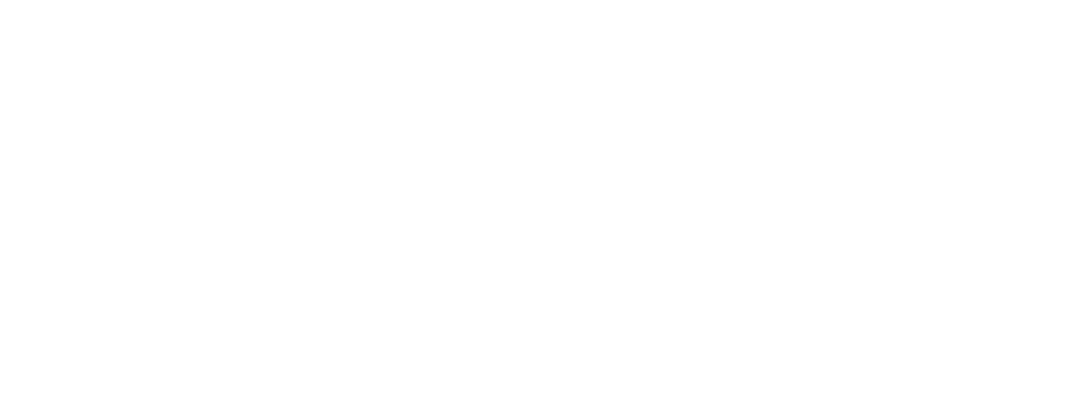

<IPython.core.display.Javascript object>


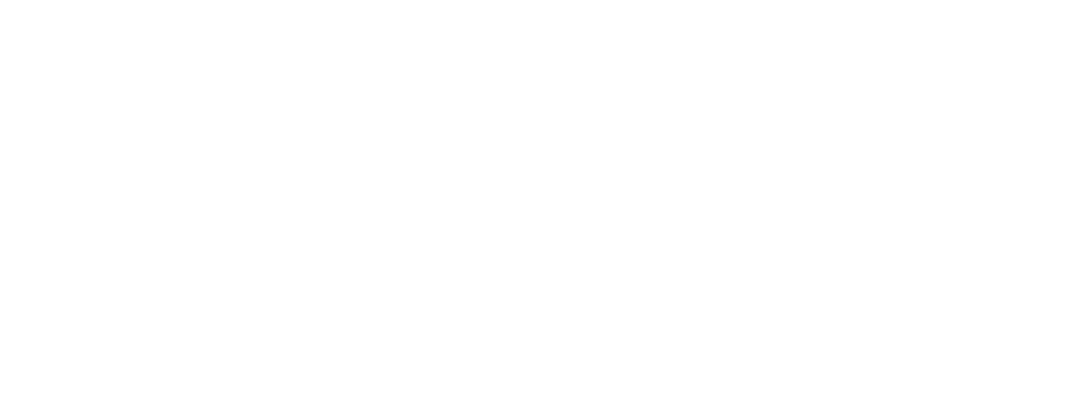

<IPython.core.display.Javascript object>


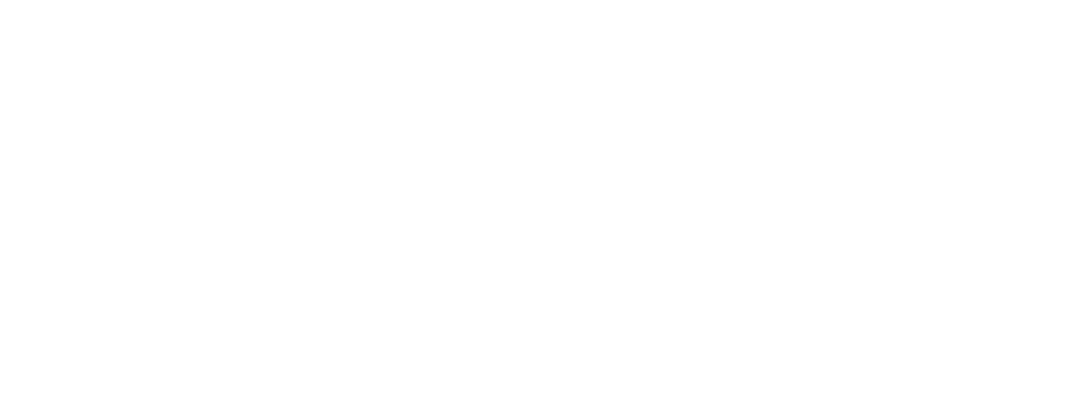

<IPython.core.display.Javascript object>


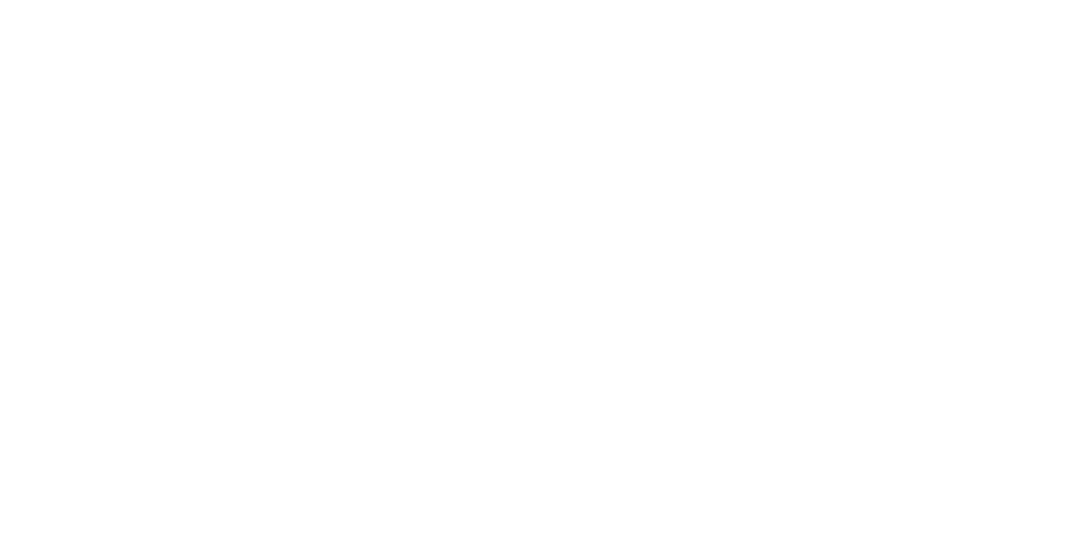

<IPython.core.display.Javascript object>


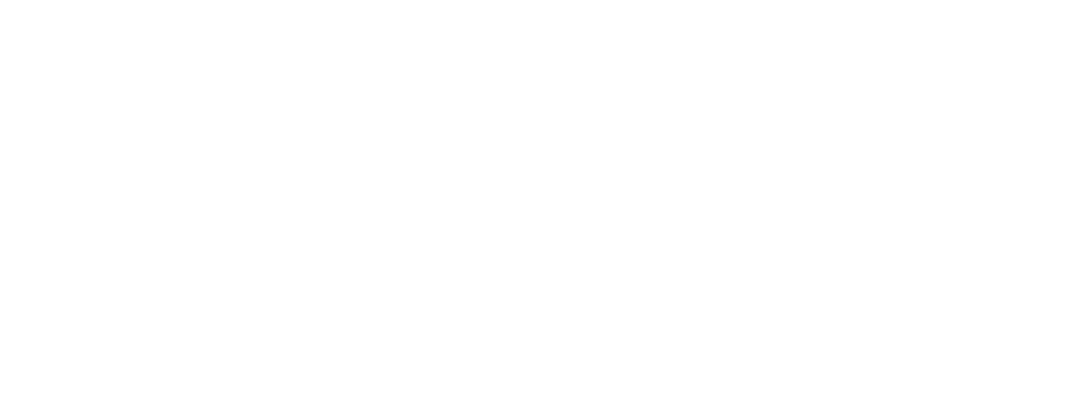

<IPython.core.display.Javascript object>


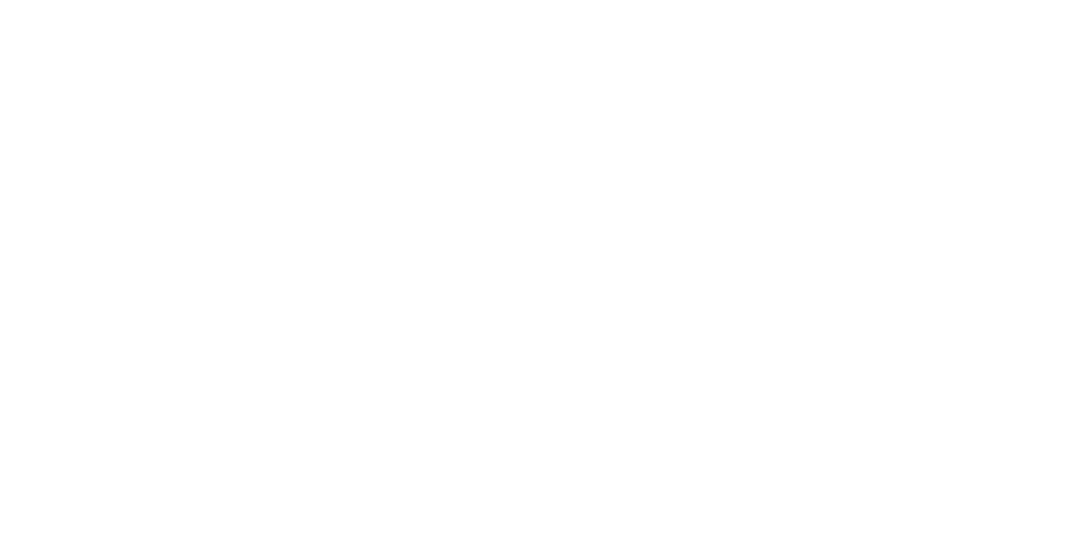

<IPython.core.display.Javascript object>


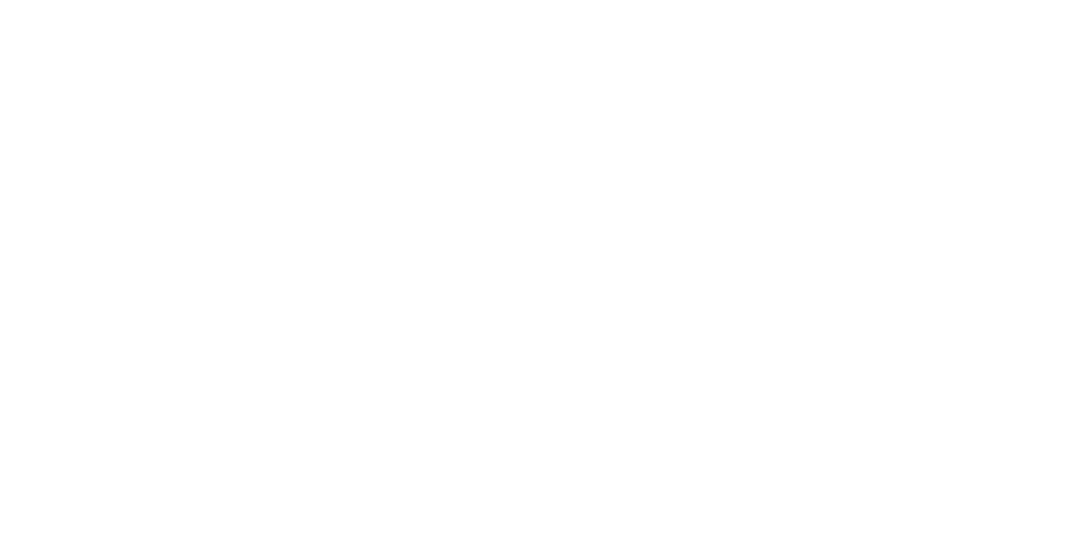

In [64]:
stock = '000063.XSHE'
df = pd.read_csv('data/000063.XSHE.csv')
df.index = pd.to_datetime(df.date)
df['openinterest'] = 0
df = df[['open', 'close', 'high', 'low', 'volume', 'openinterest']]
#     print(df)
start = datetime(2019, 9, 30)
end = datetime(2020, 9, 30)
data = bt.feeds.PandasData(dataname=df, fromdate=start, todate=end)
# 初始化cerebro回测系统设置
cerebro = bt.Cerebro()
cerebro.adddata(data)

cerebro.addstrategy(my_strategy1)
cerebro.broker.setcash(10000)
cerebro.broker.setcommission(commission=0.002)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)

cerebro.addanalyzer(btanalyzers.SharpeRatio, _name = 'sharpe')
cerebro.addanalyzer(btanalyzers.DrawDown, _name = 'drawdown')
cerebro.addanalyzer(btanalyzers.Returns, _name='returns')
cerebro.addanalyzer(btanalyzers.SQN, _name='sqn')
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')


print(f'初始资金 {cerebro.broker.getvalue()}')
result = cerebro.run()
# cerebro.plot(style='candlestick')
print('----------------------------')
print(f'最终资产 {cerebro.broker.getvalue()}')
print('----------------------------')
print(f"总收益率:  {round(result[0].analyzers.returns.get_analysis()['rtot']*100, 2)}%")
print(f"年化收益率:{round(result[0].analyzers.returns.get_analysis()['rnorm100'],2)}%")
print(f"最大回撤:  {round(result[0].analyzers.drawdown.get_analysis()['max']['drawdown'],2)}%")
print(f"夏普比率:  {round(result[0].analyzers.sharpe.get_analysis()['sharperatio'],2)}")
# print(f"SQN:       {round(result[0].analyzers.sqn.get_analysis()['sqn'],2)}")
portfolio_stats = result[0].analyzers.getbyname('PyFolio')
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()
returns.index = returns.index.tz_convert(None)
quantstats.reports.html(returns, output=f'results/{stock}_Result_4.html', title=f'{stock} Analysis')


初始资金: 10000
回测期间：20190930:20200930
总资金: 13154.1
净收益: 3154.1


<IPython.core.display.Javascript object>


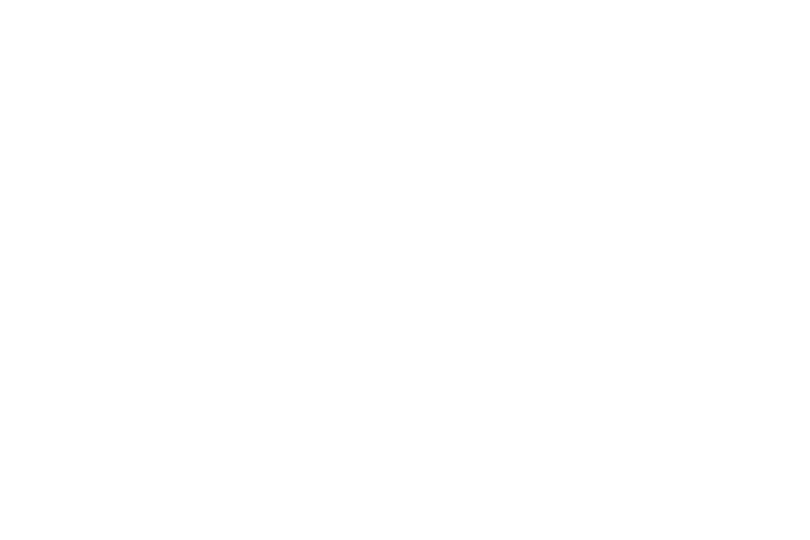

[[<Figure size 432x288 with 4 Axes>]]

E:\Anaconda\envs\pytorch_GPU\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\envs\pytorch_GPU\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


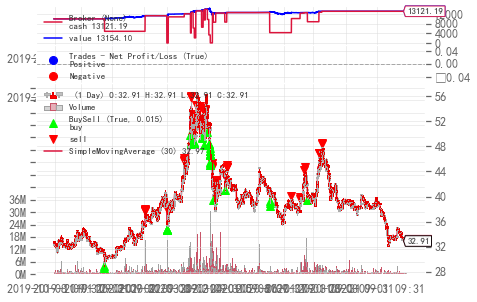

In [65]:

# 初始化cerebro回测系统设置
cerebro = bt.Cerebro()
# 将数据传入回测系统
cerebro.adddata(data)
# 将交易策略加载到回测系统中
cerebro.addstrategy(my_strategy1)
# 设置初始资本为10,000
startcash = 10000
cerebro.broker.setcash(startcash)
# 设置交易手续费为 0.2%
cerebro.broker.setcommission(commission=0.002)

d1 = start.strftime('%Y%m%d')
d2 = end.strftime('%Y%m%d')
print(f'初始资金: {startcash}\n回测期间：{d1}:{d2}')
#运行回测系统
cerebro.run()
#获取回测结束后的总资金
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
#打印结果
print(f'总资金: {round(portvalue,2)}')
print(f'净收益: {round(pnl, 2)}')
cerebro.plot(style='candlestick')